# Simulate data

In this notebook we generate data, following instructions from the part "4. Simulation experiments" of the paper.

Parameters | Distribution:
---    | ---
'S'- spot price    |     Unif[500, 1500]
'sigma' - volatility|     Unif[0.1, 1]
'tau' - time to maturity |     Unif[2w, 2y]
'r'  - risk-free rate  |   Unif[0.1%, 5%]
'K'  - strike price  |   S/z; z ~ N(1, 0.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
# Parameters
seed = 123456

param_bounds = {'S': [500, 1000],
'sigma': [0.1, 1],
'tau': [14/252, 2],
'r': [0.1/100, 5/100],
}
strikes_per_S = 4

sample_sizes = [5_000, 10_000, 20_000, 50_000, 100_000, 200_000]

For each sample of (S, sigma, tau, r) we generate 'strike_per_S' strikes. That is why each tuple (S, sigma, tau, r) will repeated 'strike_per_S' times.

In [3]:
total_num_samples = int(sum(sample_sizes)/strikes_per_S)

# generate data from uniform distribution for each parameter
np.random.seed(seed)
data = {}
for param in param_bounds.keys():
    data[param] = np.repeat( # repeat the same sampled value strikes_per_S times
        np.random.uniform(
            param_bounds[param][0], # lower bound
            param_bounds[param][1], # upper bound 
            total_num_samples), 
        strikes_per_S)

# generate 'strikes_per_S' number of strikes from normal with mean S and std 0.1*S, for each S
z = np.random.normal(
        1, # mean
        # variance of 0.1 => std=sqrt(0.1)=0.316
        # ~300 strikes will be negative
        # the author probably used 0.1 as a variance, not std.
        # With std=0.1, the number of negative strikes will be ~0
        0.1, 
        total_num_samples*strikes_per_S)

data['K'] = data['S']/z

data = pd.DataFrame(data)
data.head(50)

,S,sigma,tau,r,K
0,563.484917,0.283213,0.103238,0.024120,590.325872
1,563.484917,0.283213,0.103238,0.024120,577.181074
2,563.484917,0.283213,0.103238,0.024120,709.027220
3,563.484917,0.283213,0.103238,0.024120,528.887423
4,983.358919,0.800311,1.738972,0.026128,876.087273
5,983.358919,0.800311,1.738972,0.026128,982.591509
6,983.358919,0.800311,1.738972,0.026128,989.820570
7,983.358919,0.800311,1.738972,0.026128,1050.455880
8,630.238003,0.925717,0.702539,0.023512,544.724578
9,630.238003,0.925717,0.702539,0.023512,665.431009


In [4]:
# Label the samples with the sample id, according to the sample_sizes list.
# This will make it easier to split dataframe into samples of different sizes.
data['sample_id'] = 0
for i, _ in enumerate(sample_sizes):
    data.loc[data.index.isin(range(sum(sample_sizes[:i]), sum(sample_sizes[:i+1]))), 'sample_id'] = i

In [5]:
data.loc[data['sample_id'] == 0]

,S,sigma,tau,r,K,sample_id
0,563.484917,0.283213,0.103238,0.024120,590.325872,0
1,563.484917,0.283213,0.103238,0.024120,577.181074,0
2,563.484917,0.283213,0.103238,0.024120,709.027220,0
3,563.484917,0.283213,0.103238,0.024120,528.887423,0
4,983.358919,0.800311,1.738972,0.026128,876.087273,0
...,...,...,...,...,...,...
4995,931.343599,0.227621,0.402856,0.005217,911.638596,0
4996,715.839504,0.677604,1.057343,0.049729,804.645908,0
4997,715.839504,0.677604,1.057343,0.049729,682.634027,0
4998,715.839504,0.677604,1.057343,0.049729,677.922839,0


In [6]:
data.loc[data['sample_id'] == 1]

,S,sigma,tau,r,K,sample_id
5000,967.136855,0.742754,1.662679,0.045813,826.943450,1
5001,967.136855,0.742754,1.662679,0.045813,906.635460,1
5002,967.136855,0.742754,1.662679,0.045813,979.262199,1
5003,967.136855,0.742754,1.662679,0.045813,997.246190,1
5004,796.731921,0.944887,0.573266,0.005583,756.257853,1
...,...,...,...,...,...,...
14995,885.361414,0.610179,1.347572,0.032117,970.614307,1
14996,888.929481,0.530073,0.062902,0.033095,901.627655,1
14997,888.929481,0.530073,0.062902,0.033095,923.821892,1
14998,888.929481,0.530073,0.062902,0.033095,990.111849,1


In [7]:
data.loc[data['sample_id'] == 5]

,S,sigma,tau,r,K,sample_id
185000,850.151328,0.640552,0.206725,0.049158,783.720242,5
185001,850.151328,0.640552,0.206725,0.049158,886.834609,5
185002,850.151328,0.640552,0.206725,0.049158,974.179404,5
185003,850.151328,0.640552,0.206725,0.049158,796.582374,5
185004,536.998290,0.180625,1.360713,0.036101,523.606389,5
...,...,...,...,...,...,...
384995,953.651240,0.898391,0.935096,0.038669,1051.532656,5
384996,695.038669,0.739430,1.129417,0.039003,774.132142,5
384997,695.038669,0.739430,1.129417,0.039003,686.954716,5
384998,695.038669,0.739430,1.129417,0.039003,676.509786,5


## Black-Scholes valuation

In [8]:
def d1(S, K, r, sigma, tau):
    return (np.log(S / K) + (r + sigma**2 / 2) * tau) / (sigma * np.sqrt(tau))

def d2(S, K, r, sigma, tau):
    return d1(S, K, r, sigma, tau) - sigma * np.sqrt(tau)

def black_scholes_price(S, K, r, sigma, tau, option_type="call"):
    D1 = d1(S, K, r, sigma, tau)
    D2 = d2(S, K, r, sigma, tau)
    if option_type == "call":
        return S * norm.cdf(D1) - K * np.exp(-r * tau) * norm.cdf(D2)
    elif option_type == "put":
        return K * np.exp(-r * tau) * norm.cdf(-D2) - S * norm.cdf(-D1)

In [9]:
data['C'] = black_scholes_price(data['S'], data['K'], data['r'], data['sigma'], data['tau'], option_type="call")

### Checks

In [10]:
(data['C']>data['S']).sum()

0

In [11]:
data['C'].isna().sum()

0

Quick and dirty vola surface plot.

Text(0.5, 0, 'C')

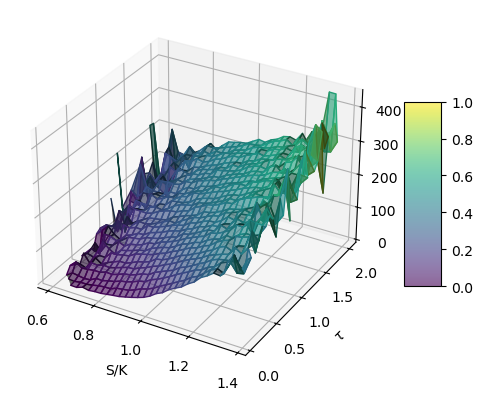

In [37]:
from scipy.interpolate import griddata

# Take only a subset of datapoints with r being in between 0.03 and 0.04, and sigma in between 0.2 and 0.3
subset = data[(data['r'] >= 0.03) & (data['r'] <= 0.04) & (data['sigma'] >= 0.4) & (data['sigma'] <= 0.6)]

# Create a grid to interpolate the surface
S_K_range = np.linspace((subset['S']/subset['K']).min(), (subset['S']/subset['K']).max(), 30)
tau_range = np.linspace(subset['tau'].min(), subset['tau'].max(), 30)
S_K_grid, tau_grid = np.meshgrid(S_K_range, tau_range)

# Average the z axis (data['C']) on a grid
C_grid = np.zeros_like(S_K_grid)
for i in range(S_K_grid.shape[0]):
    for j in range(S_K_grid.shape[1]):
        mask = (
            (data['S']/data['K'] >= S_K_range[j] - (S_K_range[1] - S_K_range[0])/2) &
            (data['S']/data['K'] < S_K_range[j] + (S_K_range[1] - S_K_range[0])/2) &
            (data['tau'] >= tau_range[i] - (tau_range[1] - tau_range[0])/2) &
            (data['tau'] < tau_range[i] + (tau_range[1] - tau_range[0])/2)
        )
        if np.any(mask):
            C_grid[i, j] = data.loc[mask, 'C'].mean()
        else:
            C_grid[i, j] = np.nan

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S_K_grid, tau_grid, C_grid, facecolors=plt.cm.viridis(C_grid / np.nanmax(C_grid)), alpha=0.6)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Label the axes
ax.set_xlabel('S/K')
ax.set_ylabel(r'$\tau$')
ax.set_zlabel('C')



Makes sense. Save the data.

In [12]:
# save the data
data.to_csv('../data/simulated/simulation_1.csv', index=False)